In [13]:
from pathlib import Path

thispath = Path('__file__').resolve()
base_path = thispath.parent.parent
import sys; sys.path.insert(0, str(base_path))

import matplotlib.pyplot as plt
from utils import metrics
import time
import pandas as pd
import ants
import numpy as np
from tqdm import tqdm
import json
#import antspy.ants_utils as a_utils
import SimpleITK as sitk
sys.path.append('../utils/')
from metrics import target_registration_error


In [5]:
dataset = pd.read_csv('../result_data/dir_lab_copd.csv')

In [62]:
sample = dataset.iloc[0]
fixed = ants.image_read(sample['e_img_path']) 
spacing = fixed.spacing
origin = fixed.origin
direction = fixed.direction

/home/edalita/Documents/MAIA/3-Semestre/MIRA/lung_registration/mira_env/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1642: DeprecationWarning:

np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)



In [65]:
direction = [[0., 1., 0.],
            [0., 0., 1.],
            [1., 0., 0.]]

In [66]:
e_img = sitk.GetArrayFromImage(sitk.ReadImage(sample['e_img_path']))
i_img = sitk.GetArrayFromImage(sitk.ReadImage(sample['i_img_path']))

In [71]:
fixed = ants.from_numpy(e_img.astype(np.float32))
moving = ants.from_numpy(i_img.astype(np.float32))

In [72]:
fixed = ants.iMath(fixed, 'Normalize', 0.0, 1.0)
moving = ants.iMath(moving, 'Normalize', 0.0, 1.0)

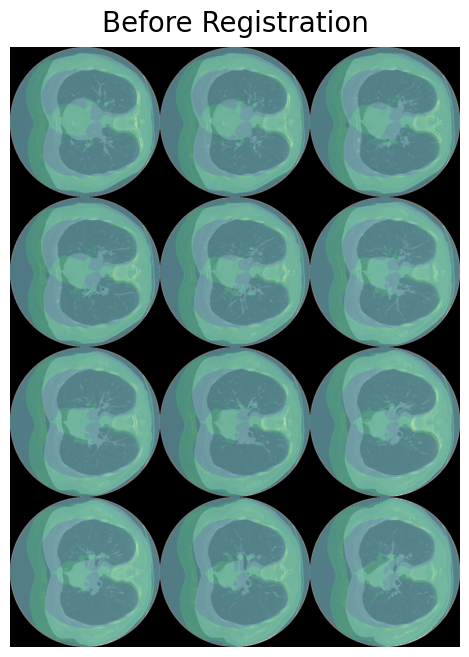

In [76]:
fixed.plot(overlay=moving, title='Before Registration', cmap='gray', overlay_cmap='viridis', overlay_alpha=0.5)

In [77]:
mytx = ants.registration(fixed=fixed, 
                         moving=moving, 
                         aff_iterations=(100, 100, 100, 50, 0),
                         aff_shrink_factors=(8, 6, 4, 2, 1),
                         aff_smoothing_sigmas=(10, 1, 0, 0, 0),
                         flow_sigma= 10,
                         total_sigma= 0.25,
                         type_of_transform="SyNOnly",
                         syn_sampling=32,
                         reg_iterations=(100, 100, 50, 0, 0),
                         syn_metric='meansquares',
                         verbose=True,
                         )

antsRegistration -d 3 -r [0x561981aaad00,0x5619827e8fd0,1] -m meansquares[0x561981aaad00,0x5619827e8fd0,1,32] -t SyN[0.200000,10.000000,0.250000] -c [100x100x50x0x0,1e-7,8] -s 4x3x2x1x0 -f 16x8x4x2x1 -u 1 -z 1 -o [/tmp/tmp5hxd7lsg,0x561981a9f720,0x561984b59640] -x [NA,NA] --float 1 --write-composite-transform 0 -v 1
All_Command_lines_OK
Using single precision for computations.
The composite transform comprises the following transforms (in order): 
  1. Center of mass alignment using fixed image: 0x561981aaad00 and moving image: 0x5619827e8fd0 (type = Euler3DTransform)
  Reading mask(s).
    Registration stage 0
      No fixed mask
      No moving mask
  number of levels = 5
  fixed image: 0x561981aaad00
  moving image: 0x5619827e8fd0
Dimension = 3
Number of stages = 1
Use histogram matching = true
Winsorize image intensities = false
  Lower quantile = 0
  Upper quantile = 1


Stage 1 State
   Image metric = MeanSquares
     Fixed image = Image (0x5619886379b0)
  RTTI typeinfo:   itk::I

In [78]:
registered = mytx['warpedmovout']

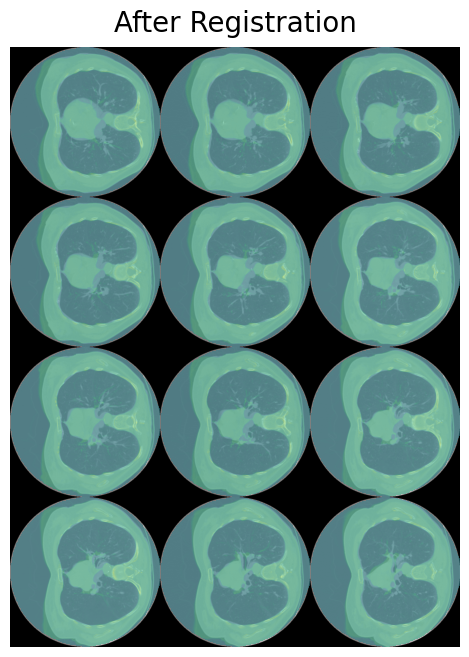

In [79]:
fixed.plot(overlay=registered, title='After Registration', cmap='gray', overlay_cmap='viridis', overlay_alpha=0.5)

In [80]:
mytx['invtransforms']

['/tmp/tmp5hxd7lsg0GenericAffine.mat', '/tmp/tmp5hxd7lsg1InverseWarp.nii.gz']